In [1]:
!pip install clean-text

In [2]:
import tweepy

In [3]:
import re
import unicodedata
import string

In [4]:
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [6]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Create your own keys on Twitter Developer
API_KEY = 'hGwC17TsW1W99swjFCXPwi5i9'
API_SECRET = 'KmgC8oGcs7uvl9B7HDMi8KUUSAzsTPOPr3vHVt9XJOiks7C5Lw'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAFqzcgEAAAAAh%2BilS8IkEYr68z%2BPlwkAGa0CAys%3Du3jZnN5YlQE3OS1hZUEq942I1fQ0kbriuNfuUyla7IqJKqL6CF'
ACCESS_TOKEN = '1519454932876808194-D8CTAAIZuvBdrqWuPecRSNX1p0S3cf'
ACCESS_TOKEN_SECRET = 'pUZatEZVOuTqBdFaBFAvts9A3hj3y7PvLaLKTpSIxUac9'

CLIENT_ID = 'UXJWX3BWbUpqRUdQSjNxeFVzb1c6MTpjaQ'
CLIENT_SECRET = 'V6enZ5OHrb8rjZ-75TfsUCOGy6Xse_kuISE7-jbdmEPnjS8vx4'
REDIRECT_URI = 'https://data-api.twitter.com/insights/engagement' 

In [9]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [10]:
query = 'Lula ladrao OR Bolsonaro gado -is:retweet'

In [11]:
response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'public_metrics'], expansions=['author_id'])

In [12]:
tweets = [tweet for tweet in response.data] 

In [13]:
#Here I prepare an .txt that will append the 100 responses
save_tweets = open('Tweets.txt', 'a')

for tweet in tweets:
    first_line = str(tweet['author_id']) + " " + tweet['text'] + "\n"     
    save_tweets.write(first_line)
    second_line = "retweet_count: " +  str(tweet.public_metrics['retweet_count']) + ", " + "reply_count: " + str(tweet.public_metrics['reply_count']) + ", " + "like_count: " + str(tweet.public_metrics['like_count']) + ", " + "quote_count: " + str(tweet.public_metrics['quote_count']) + "\n"
    save_tweets.write(second_line)
save_tweets.close()

In [14]:
#Here I read the .txt file and separate them in the text of the tweet and the public metrics
read_tweets = open('Tweets.txt', 'r')
user_tweets = []
public_metrics = []
read = read_tweets.read().split('\n')

word = ''
for i in read:
    if i.find('retweet_count: ') != -1:
        public_metrics.append(i)
        user_tweets.append(word)
        word = ''
        continue        
    word += i 

read_tweets.close()
print(user_tweets[:10])
print(len(public_metrics))

['1530301549041295360 @AtilaGPRGPR @diefoduarte7483 @jairbolsonaro Não fundamentada? Kkkk Coisas que nem o bolsonaro nega mas o gado simVcs são deploráveis', '966422258687315971 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '1236086201838419968 @DaniloGentili Eu duvido q tenha ladrão maior que Lula e vcs aí nessa ladainha sem fim !!', '1278549436545851392 RT @RCNradiochatnet: O Lula falou! "A profissão mais honesta é a do POLÍTICO, sabe porque? ...por mais ladrão que ele seja, ele tem que ir…', '4821431243 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '35562670 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o prefeito de Recife em São Paulo em reuniões da campanha de Lula l…', '1196172031718576130 RT @LuizCor24841840: 93 mortos, 26 desaparecidos e 6 mil desabrigados e o 

In [15]:
#Here I remove the duplicated tweets
lenght = len(user_tweets)-1
i = 0
        
while i < lenght:    
    if user_tweets.count(user_tweets[i]) > 1:
        user_tweets.pop(i)
        public_metrics.pop(i)
        lenght -= 1
    i += 1 
    
print(len(user_tweets), len(public_metrics))

767 767


In [16]:
def remove_urls(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"http\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

def remove_usuario(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"@\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

def remove_hashtag(lista_tweets):
    novos_tweets = []

    for tweet in lista_tweets:
        texto = re.sub(r"#\S+", "", tweet)
        novos_tweets.append(texto)

    return novos_tweets

# nova_lista = [w for word in words for w in word if w not in stop_words] brincando com python
def remove_stopwords(lista_tweets):
    words = [word_tokenize(w) for w in lista_tweets]
    stop_words = set(stopwords.words("portuguese"))
    nova_lista = []
    
    for word in words:
        tweets = []
        for w in word:
            if w not in stop_words:
                tweets.append(w)
        nova_lista.append(tweets)                
        
    return nova_lista

#Remove os emojis e acentuações
def remove_emojis(lista_tweets):
    nova_lista = []
    for i in lista_tweets:
        tweets = []
        tweets.append(clean(str(i), lower=False, no_punct=True, no_emoji=True))
        nova_lista.append(tweets)
    return nova_lista

def remove_empty_spaces(lista_tweets):
    nova_lista = [lista_tweets[i][0].split(" ") for i in range(len(lista_tweets)-1)]
            
    return nova_lista    

In [17]:
new_tweets = remove_urls(user_tweets)
new_tweets = remove_usuario(new_tweets)
new_tweets = remove_hashtag(new_tweets)
new_tweets = remove_stopwords(new_tweets)
new_tweets = remove_emojis(new_tweets)
new_tweets = remove_empty_spaces(new_tweets)

print(len(new_tweets), new_tweets[:10])

766 [['1530301549041295360', 'Nao', 'fundamentada', 'Kkkk', 'Coisas', 'bolsonaro', 'nega', 'gado', 'simVcs', 'deploraveis'], ['966422258687315971', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['1236086201838419968', 'Eu', 'duvido', 'q', 'ladrao', 'maior', 'Lula', 'vcs', 'ai', 'nessa', 'ladainha', 'fim'], ['1278549436545851392', 'RT', 'O', 'Lula', 'falou', 'A', 'profissao', 'honesta', 'POLITICO', 'sabe', 'porque', 'ladrao', 'ir'], ['4821431243', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['35562670', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], ['1196172031718576130', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 

In [18]:
def randomFeatures(tweets):
    data = []
    for t in tweets:
        feature = np.random.randint(2)
        if(feature == 1):
            data.append((t, 'yes'))
        else:
            data.append((t, 'no'))        
    return data
document_test = randomFeatures(new_tweets)
print(document_test[:10])

[(['1530301549041295360', 'Nao', 'fundamentada', 'Kkkk', 'Coisas', 'bolsonaro', 'nega', 'gado', 'simVcs', 'deploraveis'], 'yes'), (['966422258687315971', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], 'yes'), (['1236086201838419968', 'Eu', 'duvido', 'q', 'ladrao', 'maior', 'Lula', 'vcs', 'ai', 'nessa', 'ladainha', 'fim'], 'no'), (['1278549436545851392', 'RT', 'O', 'Lula', 'falou', 'A', 'profissao', 'honesta', 'POLITICO', 'sabe', 'porque', 'ladrao', 'ir'], 'yes'), (['4821431243', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], 'no'), (['35562670', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desabrigados', 'prefeito', 'Recife', 'Sao', 'Paulo', 'reunioes', 'campanha', 'Lula', 'l'], 'yes'), (['1196172031718576130', 'RT', '93', 'mortos', '26', 'desaparecidos', '6', 'mil', 'desa

In [19]:
#Here I'm formating the training data from .txt file
training_data = open('treinamento.txt', 'r').read().split("\n")
documents = []
words = []

#The last element is a empty string
for i in training_data[:len(training_data)-2]:
    feature = ''
    tweet = ''
    count_point = 0
    index = 0
    for j in i:
        if j == ';':
            count_point += 1
            
        if count_point < 1:
            feature += j
        if count_point > 1 and j == ";":
            tweet = i[index+2:len(i)-1].split(" ")
            words.append(i[index+2:len(i)-1])
            continue
        index += 1
    documents.append(([t.lower() for t in tweet], feature))
    

print(len(documents), documents[0], words[0])

1032 (['votaram', 'no', 'pezao', 'agora', 'tomem', 'no', 'czao'], 'yes') Votaram no PEZAO Agora tomem no CZAO


In [20]:
#Here I build words with no stopwords
words_without_stopwords = remove_stopwords(words)  

print(words_without_stopwords[0])

['Votaram', 'PEZAO', 'Agora', 'tomem', 'CZAO']


In [21]:
#Here I'm creating the list of Freq for each word - training set
all_words = []
for i in words_without_stopwords:
    for j in i:
        all_words.append(j.lower())

freq_words = nltk.FreqDist(all_words)
print(freq_words.most_common(15))

[('nao', 295), ('vai', 99), ('so', 91), ('e', 89), ('o', 83), ('pra', 81), ('ja', 68), ('sao', 58), ('a', 56), ('brasil', 55), ('ser', 47), ('ta', 47), ('carne', 39), ('melhor', 39), ('cara', 35)]


In [22]:
#Here I'm creating the list of Freq for each word - testing set
all_words_test = []
for i in new_tweets:
    for j in i:
        all_words_test.append(j.lower())

freq_words_test = nltk.FreqDist(all_words_test)
print(freq_words_test.most_common(15))

[('ladrao', 653), ('lula', 635), ('rt', 291), ('o', 182), ('bolsonaro', 170), ('e', 117), ('gado', 83), ('pra', 83), ('a', 70), ('vai', 70), ('q', 57), ('nao', 55), ('um', 55), ('maior', 51), ('vc', 51)]


In [23]:
word_feature = list(freq_words.keys())[:3000]
word_feature_test = list(freq_words_test.keys())

def find_features(document):
    words = set(document)
    features = {}
    for w in word_feature:
        #the key is the word in the 3000 most popular words
        #is gonna be the boolean value for w in words
        features[w] = (w in words)
        
    return features

def find_features_test(document):
    words = set(document)
    features = {}
    for w in word_feature_test:
        features[w] = (w in words)
        
    return features

print(find_features_test(all_words_test))

{'1530301549041295360': True, 'nao': True, 'fundamentada': True, 'kkkk': True, 'coisas': True, 'bolsonaro': True, 'nega': True, 'gado': True, 'simvcs': True, 'deploraveis': True, '966422258687315971': True, 'rt': True, '93': True, 'mortos': True, '26': True, 'desaparecidos': True, '6': True, 'mil': True, 'desabrigados': True, 'prefeito': True, 'recife': True, 'sao': True, 'paulo': True, 'reunioes': True, 'campanha': True, 'lula': True, 'l': True, '1236086201838419968': True, 'eu': True, 'duvido': True, 'q': True, 'ladrao': True, 'maior': True, 'vcs': True, 'ai': True, 'nessa': True, 'ladainha': True, 'fim': True, '1278549436545851392': True, 'o': True, 'falou': True, 'a': True, 'profissao': True, 'honesta': True, 'politico': True, 'sabe': True, 'porque': True, 'ir': True, '4821431243': True, '35562670': True, '1196172031718576130': True, '1477715560632881153': True, 'mais': True, 'menininha': True, 'criado': True, 'papai': True, 'vota': True, '1216106663733792768': True, 'este': True, 

In [24]:
print(documents[0])

(['votaram', 'no', 'pezao', 'agora', 'tomem', 'no', 'czao'], 'yes')


In [25]:
feature_sets = [(find_features(rev), category) for (rev, category) in documents]

In [26]:
feature_sets_test = [(find_features(rev), category) for (rev, category) in randomFeatures(new_tweets)]

In [27]:
training_set = feature_sets
test_set = feature_sets_test

In [45]:
print(training_set[0])

({'votaram': True, 'pezao': True, 'agora': True, 'tomem': True, 'czao': True, 'cuidado': False, 'poupanca': False, 'pessoal': False, 'lembram': False, 'aconteceu': False, 'epoca': False, 'collor': False, 'ne': False, 'sabe': False, 'acho': False, 'engracado': False, 'governantes': False, 'nao': False, 'pensam': False, 'cortar': False, 'regalias': False, 'beneficios': False, 'desnecessarios': False, 'favorecem': False, 'porque': False, 'sera': False, 'claro': False, 'ate': False, 'quer': False, 'enxergar': False, 'sao': False, 'estao': False, 'la': False, 'defender': False, 'proprios': False, 'interesses': False, 'empresario': False, 'casso': False, 'tambem': False, 'comecamos': False, 'tomar': False, 'atitude': False, 'mudar': False, 'vez': False, 'todas': False, 'roubalheira': False, 'nesse': False, 'pais': False, 'tendencia': False, 'so': False, 'piorar': False, 'povo': False, 'dinheiro': False, 'investimentos': False, 'aumentos': False, 'salario': False, 'falta': False, 'podiam': Fa

In [28]:
Linear_classifier = SklearnClassifier(LinearSVC())
Linear_classifier.train(training_set)
print("Linear_classifier accuracy percent:", (nltk.classify.accuracy(Linear_classifier, test_set))*100)

Linear_classifier accuracy percent: 48.9556135770235


In [29]:
SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, test_set))*100)

SVC_classifier accuracy percent: 50.13054830287206


In [58]:
dic, label = test_set[0]
print(SVC_classifier.classify_many(dic))

['no']


In [31]:
retweet_count = []
reply_count = []
like_count = []
quote_count = []

numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
count = 0

for i in public_metrics:
    number = ''
    for j in i:
        if j in numbers:
            number += j
        if j == ',':
            if count == 0:
                retweet_count.append(int(number))
                number = ''
                count += 1
            elif count == 1:
                reply_count.append(int(number))
                number = ''
                count += 1
            elif count == 2:
                like_count.append(int(number))
                number = ''
                count += 1
    if i.endswith(number):
        quote_count.append(int(number))
        number = ''
        count = 0 

In [32]:
total_retweets = sum(retweet_count)
total_reply = sum(reply_count)
total_like = sum(like_count)
total_quote = sum(quote_count)

Text(0.5, 0.98, 'Engagement')

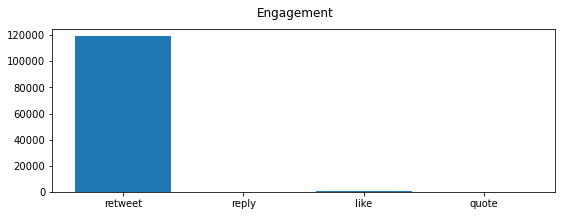

In [33]:
x_plot = ["retweet", "reply", "like", "quote"]
y_plot = [total_retweets, total_reply, total_like, total_quote]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_plot, y_plot)
fig.suptitle('Engagement')

In [34]:
print(total_retweets, total_reply, total_like, total_quote)

119058 81 378 6


In [35]:
def getFollwersOfMostRetweetUser(user_tweets, retweet_count):
    index_max = retweet_count.index(max(retweet_count))
    user_with_most_retweets = user_tweets[index_max].split(" ")
    id_user_with_most_retweets = user_with_most_retweets[0]    
    
    followers = client.get_users_followers(int(id_user_with_most_retweets), max_results=1000)[0]
    
    return (max(retweet_count), len(followers), user_with_most_retweets)

max_retweets, followers_count, user_most_retweets = getFollwersOfMostRetweetUser(user_tweets, retweet_count)

In [36]:
print(max_retweets, followers_count)

2302 1000


<BarContainer object of 2 artists>

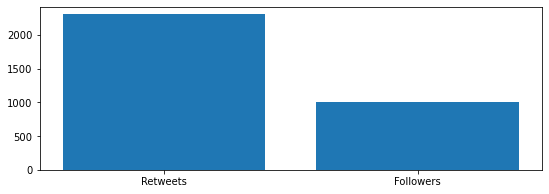

In [37]:
x_user_most_retweets = ['Retweets', 'Followers']
y_user_most_retweets = [max_retweets, followers_count]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_user_most_retweets, y_user_most_retweets)

In [38]:
print(user_most_retweets[1:])

['RT', '@FlavioBolsonaro:', 'O', 'ladrão', 'do', 'Lula', 'não', 'faz', 'isso', 'nem', 'na', 'cidade', 'em', 'que', 'ele', 'nasceu…SERÁ', 'VAIADO!Esse', 'é', 'o', 'reconhecimento', 'que', 'o', 'povo', 'brasile…']


In [39]:
oauth2_user_handler = tweepy.OAuth2UserHandler(client_id=CLIENT_ID, redirect_uri=REDIRECT_URI, scope=['tweet.read', 'users.read', 'offline.access'])

print(oauth2_user_handler.get_authorization_url())

https://twitter.com/i/oauth2/authorize?response_type=code&client_id=UXJWX3BWbUpqRUdQSjNxeFVzb1c6MTpjaQ&redirect_uri=https%3A%2F%2Fdata-api.twitter.com%2Finsights%2Fengagement&scope=tweet.read+users.read+offline.access&state=LqYI37EaVbwDRlhzzWMXEDjFlKtk3X&code_challenge=XljLYsFKm5JQW6dpRCk1xOz3I5qpwyxm8rTt48pt6ns&code_challenge_method=S256


In [40]:
# full_url = input("Paste in the full URL after you authorized your App: ")
# access_token_auth = oauth2_user_handler.fetch_token(full_url)
# access_auth = access_token_auth['access_token']

In [41]:
oauth1_user_handler = tweepy.OAuth1UserHandler(
    API_KEY, API_SECRET,
    callback=REDIRECT_URI
)

In [42]:
print(oauth1_user_handler.get_authorization_url(signin_with_twitter=True))

https://api.twitter.com/oauth/authenticate?oauth_token=5TotpgAAAAABcrNaAAABge_FvYg
